# SMOTETomek Technique to Handle imbalanced Dataset
    Prononucation: SMOTE-Tomek
    Aim: It create new points of the lowest numbers or similar to Nearest Neighbor

In [1]:
# Weblink for Credit Card Fraud Detection Data set:
# https://www.kaggle.com/mlg-ulb/creditcardfraud

import pandas as pd
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [2]:
df['Class'].value_counts()

# As, the percentage of 1's is very less = 492/(492+284315) = 0.17 %
# so, the data is imbalanced

0    284315
1       492
Name: Class, dtype: int64

In [3]:
# Splitting the given dataset into 2 datasets
# Independent Features (X) = All features Except "Class"
# Dependent Features (Y) = "Class"
X = df.drop("Class",axis=1)
y = df.Class

In [4]:
# Lets import all the necessary Librarires for "Logistic Regression Model"
from sklearn.linear_model import LogisticRegression

# Just "accuracy" is not enough. Other "metrices" should also be checked
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# For Cross Validation
from sklearn.model_selection import KFold
# For KFold
import numpy as np

# to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

In [5]:
# train -test split
from sklearn.model_selection import train_test_split

# reserving 70% dataset for training and remaining 30% for Testing purpose
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7) 

In [6]:
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [7]:
from collections import Counter
Counter(y_train)

Counter({0: 199020, 1: 344})

In [8]:
from imblearn.combine import SMOTETomek  # change "over_sampling" to "SMOTETomek"

In [9]:
os = SMOTETomek(0.5) # reduce the total parameters to 75%
X_train_os,y_train_os=os.fit_resample(X_train,y_train)
print("The number of Classes before fit {}".format(Counter(y_train)))
print("The number of Classes after fit {}".format(Counter(y_train_os)))

# Takes more time than the time of similar execution for Over Sampling
# because, "SMOTETomek Technique" create new points of the lowest numbers

C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of Classes before fit Counter({0: 199020, 1: 344})
The number of Classes after fit Counter({0: 198227, 1: 98717})


In [12]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_os,y_train_os)
# Fit Training will take MUCH MORE time to execute, Because, dataset is increased

RandomForestClassifier()

In [13]:
# copy pasted above o/p code
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

# False -ve has 

[[85277    18]
 [   22   126]]
0.9995318516437859
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.85      0.86       148

    accuracy                           1.00     85443
   macro avg       0.94      0.93      0.93     85443
weighted avg       1.00      1.00      1.00     85443



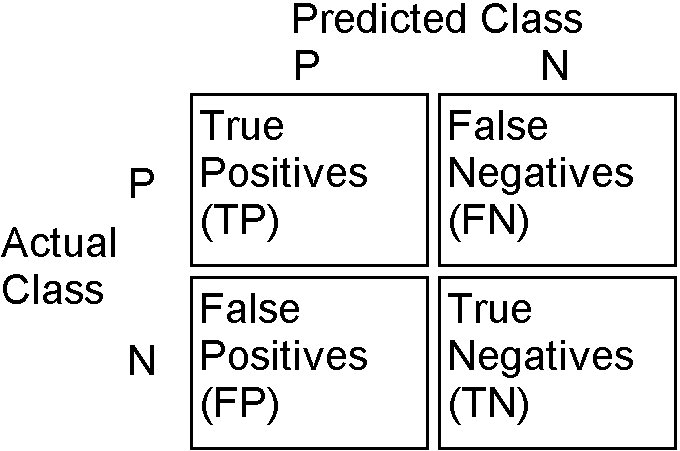